In [19]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [155]:
df = pd.read_csv(r'C:\Users\Penelope\Documents\GitHub\datasets-for-start\credit\data.csv')

In [139]:
df.head(3)

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Id                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [141]:
df.describe()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [142]:
df.corr(method='pearson').style.format('{:.2}').background_gradient(cmap='coolwarm')
# there are some highly correlated features ( NumberOfTimes90DaysLate , NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse )

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Id,1.0,0.0028,0.0024,0.0044,-0.00057,-0.0029,0.0026,0.0046,-0.0011,-0.00067,-0.00078,-5.5e-05
SeriousDlqin2yrs,0.0028,1.0,-0.0018,-0.12,0.13,-0.0076,-0.02,-0.03,0.12,-0.007,0.1,0.046
RevolvingUtilizationOfUnsecuredLines,0.0024,-0.0018,1.0,-0.0059,-0.0013,0.004,0.0071,-0.011,-0.0011,0.0062,-0.001,0.0016
age,0.0044,-0.12,-0.0059,1.0,-0.063,0.024,0.038,0.15,-0.061,0.033,-0.057,-0.21
NumberOfTime30-59DaysPastDueNotWorse,-0.00057,0.13,-0.0013,-0.063,1.0,-0.0065,-0.01,-0.055,0.98,-0.031,0.99,-0.0027
DebtRatio,-0.0029,-0.0076,0.004,0.024,-0.0065,1.0,-0.029,0.05,-0.0083,0.12,-0.0075,-0.041
MonthlyIncome,0.0026,-0.02,0.0071,0.038,-0.01,-0.029,1.0,0.091,-0.013,0.12,-0.011,0.063
NumberOfOpenCreditLinesAndLoans,0.0046,-0.03,-0.011,0.15,-0.055,0.05,0.091,1.0,-0.08,0.43,-0.071,0.065
NumberOfTimes90DaysLate,-0.0011,0.12,-0.0011,-0.061,0.98,-0.0083,-0.013,-0.08,1.0,-0.045,0.99,-0.01
NumberRealEstateLoansOrLines,-0.00067,-0.007,0.0062,0.033,-0.031,0.12,0.12,0.43,-0.045,1.0,-0.04,0.12


In [186]:
df = pd.read_csv(r'C:\Users\Penelope\Documents\GitHub\datasets-for-start\credit\data.csv')
y = df['SeriousDlqin2yrs']
df.drop(columns=['Id', 'SeriousDlqin2yrs'], inplace=True) # remember to get rid off y in prod
df = df.fillna(0)

In [187]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

def log_transform(x):
    return np.log(x + 1)

transformer = FunctionTransformer(log_transform)
df['MonthlyIncome']= transformer.transform(df['MonthlyIncome'])
df['DebtRatio'] =  transformer.transform(df['MonthlyIncome'])
df['RevolvingUtilizationOfUnsecuredLines'] = transformer.transform(df['RevolvingUtilizationOfUnsecuredLines'])

In [188]:
df.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.257900,52.295207,0.421033,1.776866,6.743949,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.384852,14.771866,4.192781,0.922711,3.559175,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029430,41.000000,0.000000,2.121861,7.346655,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.143391,52.000000,0.000000,2.238567,8.379883,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.444074,63.000000,0.000000,2.293481,8.909370,11.000000,0.000000,2.000000,0.000000,1.000000
max,10.833859,109.000000,98.000000,2.767390,14.917036,58.000000,98.000000,54.000000,98.000000,20.000000


As one can tell, it's not normal distribution (so be-careful don't use those algorithms)
It's fine for now, since I am planning to use tree based models anyway

((array([-4.43418927, -4.23918495, -4.13325226, ...,  4.13325226,
          4.23918495,  4.43418927]),
  array([ 0.        ,  0.        ,  0.        , ..., 14.26026112,
         14.39999232, 14.9170356 ])),
 (2.8854170282758007, 6.743949462928209, 0.8106766099338357))

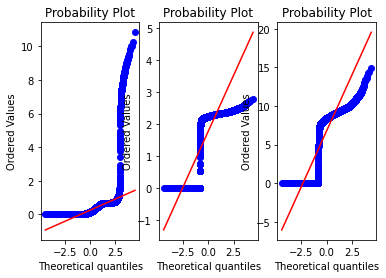

In [45]:
fig = plt.subplots()
ax1 = plt.subplot(1,3,1)
stats.probplot(df['RevolvingUtilizationOfUnsecuredLines'], dist=stats.norm, plot=ax1)
ax2 = plt.subplot(1,3,2)
stats.probplot(df['DebtRatio'], dist=stats.norm, plot=ax2)
ax3 = plt.subplot(1,3,3)
stats.probplot(df['MonthlyIncome'], dist=stats.norm, plot=ax3)

fig = plt.subplots()
ax1 = plt.subplot(1,3,1)
stats.probplot(df['RevolvingUtilizationOfUnsecuredLines'], dist=stats.norm, plot=ax1)
ax2 = plt.subplot(1,3,2)
stats.probplot(df['DebtRatio'], dist=stats.norm, plot=ax2)
ax3 = plt.subplot(1,3,3)
stats.probplot(df['MonthlyIncome'], dist=stats.norm, plot=ax3)

In [217]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(df, y, test_size=0.2)

In [218]:
from collections import Counter
Counter(ytrain)

Counter({0: 111927, 1: 8073})

In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
pos_weight = np.sum(ytrain==0)/np.sum(ytrain==1)
model = XGBClassifier(n_jobs=-1, random_state = 0, scale_pos_weight=pos_weight)

model.fit(Xtrain, ytrain)
ytest_pred = model.predict(Xtest)
ytest_pred_p = model.predict_proba(Xtest)[:,1]
print(roc_auc_score(ytest_pred, ytest))
print(classification_report(ytest_pred, ytest))

C:\Users\Penelope\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6000679604832243
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     23837
           1       0.71      0.22      0.34      6163

    accuracy                           0.82     30000
   macro avg       0.77      0.60      0.62     30000
weighted avg       0.80      0.82      0.78     30000



In [227]:
from sklearn.compose import ColumnTransformer
df = pd.read_csv(r'C:\Users\Penelope\Documents\GitHub\datasets-for-start\credit\data.csv')
y = df['SeriousDlqin2yrs']
df = df.fillna(0)
df.drop(columns=['Id', 'SeriousDlqin2yrs'], inplace=True) # remember to get rid off y in prod
pos_weight = np.sum(y==0)/np.sum(y==1)

def log_transform(x):
    return np.log(x + 1)

log_pipeline = Pipeline([
    ('log-scale', FunctionTransformer(log_transform))])
    
preproc_pipeline = ColumnTransformer([
    ('log-scale-pipe', log_pipeline, ['MonthlyIncome', 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines'])])
X = preproc_pipeline.fit_transform(Xtrain)

params_o = bayes_trials.best_trial['result']['params']
#model_pipeline = Pipeline([('clf', XGBClassifier(n_jobs=-1, random_state=0, params=params_o))])

pipe_l = Pipeline([('pre',preproc_pipeline), 
                   ('clf', XGBClassifier(n_jobs=-1, random_state=0, params=params_o))])

pipe_l.fit(Xtrain, ytrain)


C:\Users\Penelope\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('log-scale-pipe',
                                                  Pipeline(steps=[('log-scale',
                                                                   FunctionTransformer(func=<function log_transform at 0x000001C8E14483A0>))]),
                                                  ['MonthlyIncome', 'DebtRatio',
                                                   'RevolvingUtilizationOfUnsecuredLines'])])),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_...
                                       'learning_rate': 0.038553681100723214,
                                       'max_depth': 4, 'min_child_weight': 4,
                                       'reg_alpha': 5.574415552334985,
                                       'reg_lambda': 5.311747915021241,
  

In [228]:
ytest_pred1 = model_pipeline.predict(preproc_pipeline.fit_transform(Xtest))
print(roc_auc_score(ytest_pred1, ytest))
print(classification_report(ytest_pred1, ytest))

0.6474912845191471
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     29827
           1       0.03      0.36      0.06       173

    accuracy                           0.93     30000
   macro avg       0.51      0.65      0.51     30000
weighted avg       0.99      0.93      0.96     30000



# Cleanup Time
Time to clean up the code and do optimization 

In [58]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from functools import partial
from xgboost import XGBClassifier
import pandas as pd
import numpy  as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.stochastic import sample
from xgboost import DMatrix
import xgboost
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer


df = pd.read_csv(r'C:\Users\Penelope\Documents\GitHub\datasets-for-start\credit\data.csv')
y = df['SeriousDlqin2yrs']
df.drop(columns=['Id', 'SeriousDlqin2yrs'], inplace=True)

def log_transform(x):
    return np.log(x + 1)

copy_keys = df.drop(columns=['MonthlyIncome', 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines']).keys()
log_pipeline = Pipeline([
    ('fillna',SimpleImputer(strategy='median')),
    ('log-scale', FunctionTransformer(log_transform))])

normal_pipeline = Pipeline([('fillna', SimpleImputer(strategy='median'))])
    
preproc_pipeline = ColumnTransformer([
    ('copy-transform', normal_pipeline, copy_keys),
    ('log-scale-pipe', log_pipeline, ['MonthlyIncome', 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines'])])

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(df, y, test_size=0.2)


space = {
    'params': {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),
    'gamma': hp.uniform('gamma', 0, 1),
    'max_depth': hp.quniform('max_depth', 3, 8, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 12, 2),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0.1, 10),
    'reg_lambda': hp.uniform('reg_lambda', 0.1, 10),
    'verbosity':0 }
}

         
def objective(hps, X, y):
    hps['params']['max_depth'] = int( hps['params']['max_depth'])
    hps['params']['min_child_weight'] = int( hps['params']['min_child_weight'])
    
    scale_pos_weight = np.sum(y==0)/np.sum(y==1)
    hps['params']['scale_pos_weight'] = scale_pos_weight
    
    XG = DMatrix(preproc_pipeline.fit_transform(X), label=ytrain)
    cv_results = xgboost.cv(hps['params'], XG, num_boost_round=500, nfold=3,
    metrics='auc', early_stopping_rounds=25, seed=0)

    mean_score = np.mean(cv_results['test-auc-mean'])
    #print(mean_score)
    loss = 1 - mean_score
    n_estimators = int(np.argmax(cv_results['test-auc-mean']) + 1)
    return {'loss': loss, 'status': STATUS_OK, 'n_estimator': n_estimators, 'params': hps['params']}

bayes_trials_p = Trials()
bestp = fmin(partial(objective, X=Xtrain, y=ytrain), space, algo = tpe.suggest, max_evals=100, trials=bayes_trials_p)

100%|██████████████████████████████████████████████| 100/100 [41:25<00:00, 24.86s/trial, best loss: 0.1383574318657096]


In [59]:
print(bayes_trials_p.best_trial['result'])

{'loss': 0.1383574318657096, 'status': 'ok', 'n_estimator': 395, 'params': {'colsample_bytree': 0.6738806104749963, 'gamma': 0.8564756562787899, 'learning_rate': 0.015995675213049818, 'max_depth': 5, 'min_child_weight': 10, 'reg_alpha': 9.110169492055862, 'reg_lambda': 4.381631890788606, 'subsample': 0.6384292636479094, 'verbosity': 0, 'scale_pos_weight': 13.864362690449648}}


In [60]:
params_best = bayes_trials_p.best_trial['result']['params']
model_pipeline = Pipeline([('clf', XGBClassifier(n_jobs=-1, params=params_best))])
overall_pipes = Pipeline([('preprocessing', preproc_pipeline),
                          ('model', model_pipeline)])
overall_pipes.fit(Xtrain, ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('copy-transform',
                                                  Pipeline(steps=[('fillna',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['age', 'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      d...
                                                num_parallel_tree=1,
                                                params={'colsample_bytree': 0.6738806104749963,
                                                        'gamma': 0.8564756562787899,
                                                        'learning_rate': 0.015995675213049818,
                                                        'max_depth': 5,
       

In [61]:
from sklearn.metrics import classification_report, roc_auc_score
y_pred_pipe = overall_pipes.predict(Xtest)
print(classification_report(y_pred_pipe, ytest))
print(roc_auc_score(y_pred_pipe, ytest))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     29278
           1       0.20      0.54      0.29       722

    accuracy                           0.94     30000
   macro avg       0.59      0.75      0.63     30000
weighted avg       0.97      0.94      0.95     30000

0.7455195008060091


In [87]:
import joblib
joblib.dump(overall_pipes, 'pipe-process.joblib')

['pipe-process.joblib']

In [96]:
print(xgboost.__version__)

1.6.1
